# markdown
['DOB_partner_man',
'DOB_partner_woman',
'Date_of_marriage']


In [100]:
ls

divorces_2000-2015_original.csv    en_col_desc.csv   Untitled.ipynb
divorces_2000-2015_translated.csv  en_col_names.txt
eda.ipynb                          tmp/


Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,Residence_federal_partner_man,Residence_country_partner_man,Monthly_income_partner_man_peso,Occupation_partner_man,Place_of_residence_partner_man,Nationality_partner_woman,DOB_partner_woman,DOB_registration_date_partner_woman,Place_of_birth_partner_woman,Birth_municipality_of_partner_woman,Birth_federal_partner_woman,Birth_country_partner_woman,Age_partner_woman,Place_of_residence_partner_woman,Residence_municipality_partner_woman,Residence_federal_partner_woman,Residence_country_partner_woman,Occupation_partner_woman,Monthly_income_partner_woman_peso,Date_of_marriage,Marriage_certificate_place,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody

In [132]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date as d
from dateutil.relativedelta import relativedelta as rd
import seaborn as sn
import matplotlib.pyplot as plt

In [102]:
D=d(2021,7,13)
print('D',D,type(D))

print(pd.to_datetime(D))

D 2021-07-13 <class 'datetime.date'>
2021-07-13 00:00:00


# READ the data

In [103]:
# usecols with numbers and names re-names columns
# parse_dates is list of col to make dates.
df = pd.read_csv('divorces_2000-2015_translated.csv'
                    ,header=0
                    ,usecols=[0,3,16,29]
                    ,names=['dod','man','wom','dom']
                    ,parse_dates=[0,1,2,3]
                 )
# drop any rows with NaN
df = df.dropna()
df.head(3)
# notice row 2 is wrong century

,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


In [104]:
# make temp columns to calc correct century
df['man_yr']  =pd.to_datetime(df['man']).dt.year
df['man_mo'] =pd.to_datetime(df['man']).dt.month
df['man_da']   =pd.to_datetime(df['man']).dt.day

df['wom_yr']  =pd.to_datetime(df['wom']).dt.year
df['wom_mo'] =pd.to_datetime(df['wom']).dt.month
df['wom_da']   =pd.to_datetime(df['wom']).dt.day

df['mar_yr']  =pd.to_datetime(df['dom']).dt.year
df['mar_mo'] =pd.to_datetime(df['dom']).dt.month
df['mar_da']   =pd.to_datetime(df['dom']).dt.day

df['div_yr']  =pd.to_datetime(df['dod']).dt.year
df['div_mo'] =pd.to_datetime(df['dod']).dt.month
df['div_da']   =pd.to_datetime(df['dod']).dt.day


df.head(3)

,dod,man,wom,dom,man_yr,man_mo,man_da,wom_yr,wom_mo,wom_da,mar_yr,mar_mo,mar_da,div_yr,div_mo,div_da
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,1975,12,18,1983,8,1,2000,6,26,2006,9,6
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18,2055,2,22,2047,3,21,1975,12,18,2005,1,2
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,1975,10,30,1978,10,13,1998,11,14,2006,1,2


In [105]:
# calc century based on this year (2021) : hardcoded 
df['man_yr']= df['man_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['wom_yr']= df['wom_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['mar_yr']= df['mar_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df['div_yr']= df['div_yr'].apply(lambda x: x-100 if x>2021 else x ) 
df.head(3)

,dod,man,wom,dom,man_yr,man_mo,man_da,wom_yr,wom_mo,wom_da,mar_yr,mar_mo,mar_da,div_yr,div_mo,div_da
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,1975,12,18,1983,8,1,2000,6,26,2006,9,6
2,2005-01-02,2055-02-22,2047-03-21,1975-12-18,1955,2,22,1947,3,21,1975,12,18,2005,1,2
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,1975,10,30,1978,10,13,1998,11,14,2006,1,2


In [106]:
# re-assign birthdates ,mar,div based on corrected centuries:
df['man']=df.apply( lambda x: d( x.man_yr,x.man_mo,x.man_da ) ,axis=1)
df['wom']=df.apply( lambda x: d( x.wom_yr,x.wom_mo,x.wom_da ) ,axis=1)
df['dom']=df.apply( lambda x: d( x.mar_yr,x.mar_mo,x.mar_da ) ,axis=1)
df['dod']=df.apply( lambda x: d( x.div_yr,x.div_mo,x.div_da ) ,axis=1)

# drop temp columns
df.drop([ 'man_yr','man_mo','man_da'
         ,'wom_yr','wom_mo','wom_da'
         ,'mar_yr','mar_mo','mar_da'
         ,'div_yr','div_mo','div_da'
        ]
        , axis = 1
        , inplace = True)
print('DF final')
df.head(3)

DF final


,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


# DATA CLEANED

In [107]:
# df_dob=df.copy('deep')
df.head(3)

,dod,man,wom,dom
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14


In [108]:
# calc age_dif, age_man age_woman
df['age_dif'] = df.apply( lambda x: 
                            round(  (  rd( x['wom'], x['man']).years*12 
                                     + rd( x['wom'], x['man']).months  
                                     )/12
                                  )
                         ,axis = 1)
df['abs_dif'] = df.apply( lambda x: 
                            abs( x['age_dif'] )
                         ,axis = 1)

df['mar_len'] = df.apply( lambda x: 
                            round(  (  rd( x['dod'], x['dom']).years*12 
                                     + rd( x['dod'], x['dom']).months  
                                     )/12
                                  )
                         ,axis = 1)


df['age_man'] = df.apply( lambda x: 
                            round(  (  rd( x['dom'], x['man']).years*12 
                                     + rd( x['dom'], x['man']).months  
                                     )/12
                                  )
                         ,axis = 1)

df['age_wom'] = df.apply( lambda x: 
                            round(  (  rd( x['dom'], x['wom']).years*12 
                                     + rd( x['dom'], x['wom']).months  
                                     )/12
                                  )
                         ,axis = 1)
              

df['age_min'] = df.apply( lambda x: min( x['age_man'],x['age_wom'] )
                        ,axis = 1)

df['age_max'] = df.apply( lambda x: 
                            max( x['age_man'],x['age_wom'] )
                         ,axis = 1)

df['pct_up'] = df.apply( lambda x: 
                          round( x['abs_dif']/x['age_min'] *100)
                         ,axis = 1)

df['pct_dn'] = df.apply( lambda x: 
                          round( x['abs_dif']/x['age_max'] *100)
                         ,axis = 1)

df.head(3)

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,8,8,6,24,17,17,24,47,33
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18,-8,8,29,21,29,21,29,38,28
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,3,3,7,23,20,20,23,15,13


In [109]:
df[df['age_wom']<0]

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
462,2001-04-01,1943-03-06,1954-05-01,1931-08-31,11,11,70,-12,-23,-23,-12,-48,-92
1799,2004-12-02,1944-12-06,1997-02-01,1967-10-16,52,52,37,23,-29,-29,23,-179,226


In [110]:
df.drop( [462,1799]
           , axis = 0, inplace = True)

In [111]:
# df[ df['age_man']<15]

In [112]:
# df[ df['age_wom']<15 ]

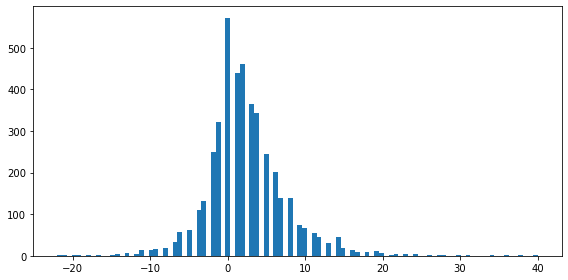

In [113]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(8,4))
ax.set_title='Age Difference'
ax.hist(df['age_dif'],bins = 100);
# plt.show()
fig.tight_layout();

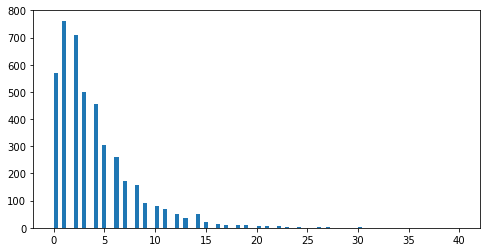

In [114]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(8,4))
ax.hist(df['abs_dif'],bins =100);

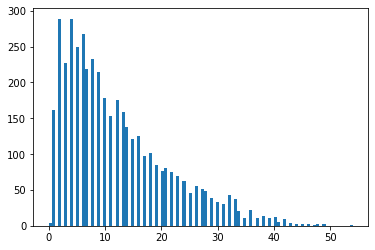

In [115]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.hist(df['mar_len'],bins =100);

<AxesSubplot:>

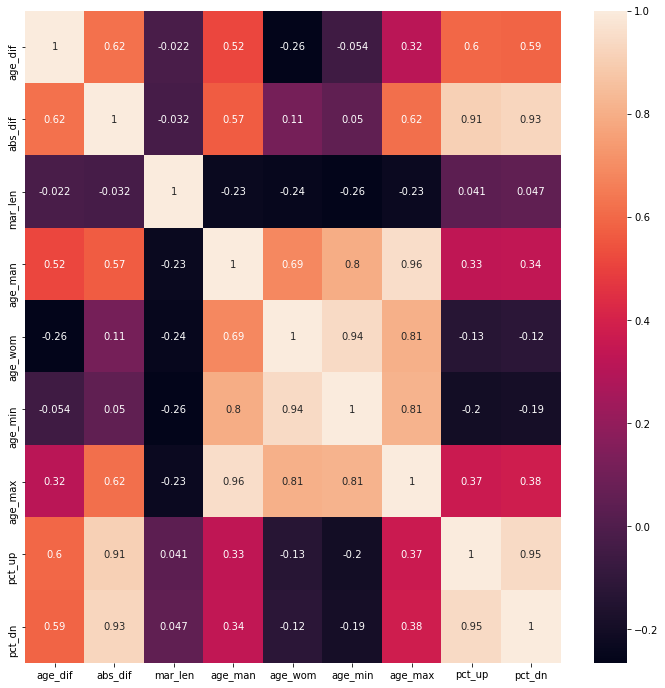

In [145]:
fig,ax = plt.subplots(figsize=(12,12))
sn.heatmap(df.corr(),annot=True)
# plt.show(snheat)

In [117]:

( df.loc[ : , ['abs_dif','mar_len'] ] )

,abs_dif,mar_len
0,8,6
2,8,29
4,3,7
5,3,11
6,0,15
...,...,...
4918,1,4
4919,1,1
4920,2,36
4921,6,34


In [118]:
df[ ['abs_dif','mar_len'] ]

,abs_dif,mar_len
0,8,6
2,8,29
4,3,7
5,3,11
6,0,15
...,...,...
4918,1,4
4919,1,1
4920,2,36
4921,6,34


In [119]:
df.head(3)

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,8,8,6,24,17,17,24,47,33
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18,-8,8,29,21,29,21,29,38,28
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,3,3,7,23,20,20,23,15,13


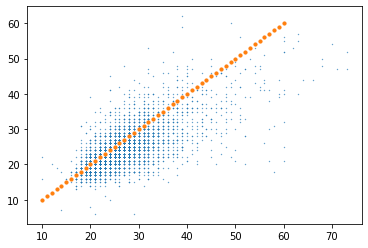

In [120]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.scatter( df['age_man'],df['age_wom'],s=.1)
# ax.line([10,10],[60,60])
ax.scatter( list(range(10,61)),list(range(10,61)),s=10)




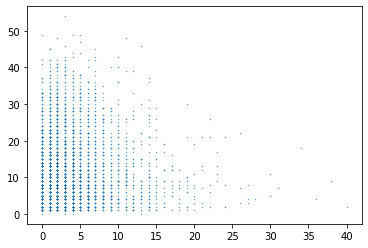

In [121]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.scatter( df['abs_dif'],df['mar_len'],s=.1)
# ax.line([10,10],[60,60])


In [122]:
df['age_dif'].mean(),df['age_dif'].std()

(2.329139981701738, 5.212776824802249)

In [123]:
df['abs_dif'].mean(),df['abs_dif'].std()

(3.959057639524245, 4.113569381719339)

In [124]:
df['mar_len'].mean(),df['mar_len'].std()

(12.225754803293688, 9.267772071996777)

In [125]:
df['pct_up'].mean(),df['pct_up'].std()

(17.400274473924977, 19.622119471720953)

In [126]:
df['pct_dn'].mean(),df['pct_dn'].std()

(13.065645013723696, 10.968269785672646)

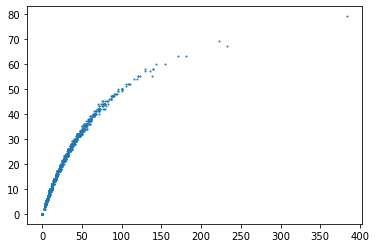

In [148]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.scatter( df['pct_up'],df['pct_dn'],s=1)
# ax.line([10,10],[60,60])
# ax.scatter( list(range(10,61)),list(range(10,61)),s=10)


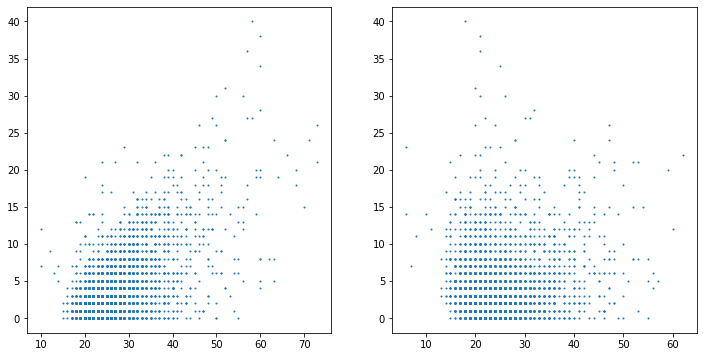

In [152]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2,figsize=(12,6))
ax[0].scatter( df['age_man'],df['abs_dif'],s=1)
ax[1].scatter( df['age_wom'],df['abs_dif'],s=1)
# ax.line([10,10],[60,60])
# ax.scatter( list(range(10,61)),list(range(10,61)),s=10)

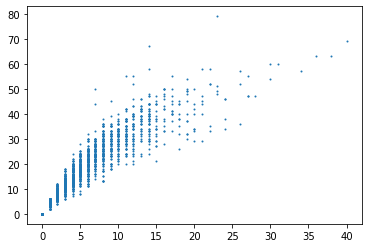

In [147]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
ax.scatter( df['abs_dif'],df['pct_dn'],s=1)

In [129]:
df.head()

,dod,man,wom,dom,age_dif,abs_dif,mar_len,age_man,age_wom,age_min,age_max,pct_up,pct_dn
0,2006-09-06,1975-12-18,1983-08-01,2000-06-26,8,8,6,24,17,17,24,47,33
2,2005-01-02,1955-02-22,1947-03-21,1975-12-18,-8,8,29,21,29,21,29,38,28
4,2006-01-02,1975-10-30,1978-10-13,1998-11-14,3,3,7,23,20,20,23,15,13
5,2006-01-02,1973-03-28,1976-06-14,1995-01-20,3,3,11,22,19,19,22,16,14
6,2007-01-02,1970-12-13,1971-04-11,1991-08-16,0,0,15,21,20,20,21,0,0


In [130]:

]

SyntaxError: unmatched ']' (<ipython-input-130-de603c91038f>, line 1)